# <center> Proteinus : package Python </center>
----------
![Logo mmsb](http://www.ibcp.fr/wp-content/uploads/2017/01/logo_MMSB_200.png "mmsb")![Lyon1](https://upload.wikimedia.org/wikipedia/en/thumb/d/d3/Claude_Bernard_University_Lyon_1_%28logo%29.svg/230px-Claude_Bernard_University_Lyon_1_%28logo%29.svg.png "Lyon1")


## Code Python

Importations des paquets nécessaire pour le programme *Proteinus*.  
⚠ Les paquets `requests`, `etree` doivent être installé sur la machine. Une commande possible d'installation peut être : `pip install *paquet* --user`.

In [4]:
import os
import sys
import requests
import xml.etree.ElementTree as XML
import shutil
import math
import re

Modules pyproteinsExt et pyproteins

In [2]:
# module pyproteins & pyproteinsExt
#sys.path.append("/Users/aheurtel/Documents/Stage/pyproteins/src")
sys.path.append("/home/antoine/Documents/Stage2019/Stage/pyproteins/src")
#sys.path.append("/Users/aheurtel/Documents/Stage/pyproteinsExt/src")
sys.path.append("/home/antoine/Documents/Stage2019/Stage/pyproteinsExt/src")
sys.path
import pyproteinsExt.uniprot as uniprot
import pyproteins.sequence.msa as msaLib

Variables globales nécessaires pour le bon fonctionnement du programme.

In [3]:
##                      GlobVAR
PATH = "/Users/aheurtel/Documents/Protein/"
# Uniprot
FEAT = ['citation','clusters','comments','domains','domain','ec','id','entry name','existence',
        'families','features','genes','go','go-id','interactor','keywords','last-modified',
        'length','organism','organism-id','pathway','protein names','reviewed','sequence',
        '3d version','virus hosts']
#parameter commun of API
MAIL = 'antoine.heurtel@ibcp.fr'
#WebLogo
#GlobVar pour WebLogo #list establised from https://www.uniprot.org/help/api_queries
TITLE = 'WebLogo'
LABEL = ''
LEN = 40
DPI = 400
START = 1
BOX = 'yes'
COLOR = 'chemistry'

### Fonctions
Définitions des fonctions du programme.

In [4]:
def uniprotInfo(prot, element='', echo = False, xml = False, name = 'uniprot.xml', path = ''):
    if xml:
        if os.path.exists(PATH+prot+'Data/'+name):
            print('file {} already exist, please select a other name.'.format(name))
            return True
        else:
            try:
                f = open(path+name, 'w')
            except FileNotFoundError:
                path = input('Please enter the folder to save your data : ')
                if not path[-1] == '/':
                    path += '/'
                f = open(path+name, 'w')
            webpage = requests.get('https://www.uniprot.org/uniprot/'+prot+'.xml')
            f.write(webpage.text)
            f.close()
            return None
    for i in element:
        if i not in FEAT:
            print("L' element "+str(i)+" n'est pas reconnu.")
            print("Choisissez parmi : "+str(FEAT))
        #a faire verif protéine existe
        PROTEIN = prot
        col = ''
        #faire la possibilité ou a est vide if a !='':INFO = '&columns='+INFO
        for i in element:
            col += i+','
        INFO = '&columns='+col[:-1]
        URL = "https://www.uniprot.org/uniprot/?query="+PROTEIN+"&format=tab"+INFO
        print('from '+URL)
        web = requests.get(URL)
        if echo:
            print(web.text)
            return None
        else:
            return(web.text)
        
def makeURL(element,prot):
    '''
    fonction pour creer des url à sousmettre à UniProt
    element sont les info que l'on veut et prot la protein au code uniprot
    '''
    for i in element:
        if i not in FEAT:
            print("L' element "+str(i)+" n'est pas reconnu.")
            print("Choisissez parmi : "+str(FEAT))
    #a faire verif protéine existe
    PROTEIN = prot
    col = ''
    #faire la possibilité ou a est vide if a !='':INFO = '&columns='+INFO
    for i in element:
        col += i+','
    INFO = '&columns='+col[:-1]
    URL = "https://www.uniprot.org/uniprot/?query="+PROTEIN+"&format=tab"+INFO
    return(URL,PROTEIN)

def makeDirectory(name):
    if not os.path.exists(PATH+name):
        os.makedirs(PATH+name+'/Data/')
    if not os.path.exists(PATH+name+'/Data/WebLogo'):
        os.makedirs(PATH+name+'/Data/WebLogo')
    return True

def verifSeq(name):
    return os.path.exists(PATH+name+'/Data/sequence')

def writeFile(file, text, path = None):
    """
    fonction pour écrire un fichier dans un path donné si le fichier n'existe pas
    """
    if os.path.exists(path+file) or os.path.exists(path+'/'+file):
        print('already exist')
        return False
    else:
        f = open(path+file,'w')
        f.write(text)
        f.close()

def verifFile(file, path=''):
    """
    Vérification de l’existance d’un fichier
    Retourne un booléen
    """
    if not file:
        return False
    
    m = re.findall('([^\.]+)',file)
    if not m:
        raise ValueError, "filename incorrect +"
    filename = ".".join(m[:-1])
    ext = m[-1]
    if os.path.exists(path+filename) or os.path.exists(path+'/'+filename):
        return True
    
    elif os.path.exists(path+filename+ext) or os.path.exists(path+'/'+filenam+ext) or os.path.exists(path+'/'+filename+'.'+ext):
        return True
    
    else:
        return False

def sequenceUniprot(prot):
    '''
    récupère la séquence d'une protéine depuis internet (uniprot)
    '''
    url = makeURL(['sequence'],prot)
    web = requests.get(url[0])
    return(web.text.split('\n')[1])


## POO
Définition de l'objet *protein*

In [5]:
class Protein:
    def __init__(self, name):
        '''
        name = protein code accession
        '''
        #self.id = name #on peut créer une fct de vérif de nom
        #self.name = ''
        self.name = name
        if makeDirectory(name):
            self.pwd = PATH+name+'/Data/'
        if not verifSeq(name):
            print('Download uniprot.xml')
            uniprotInfo(name, xml = True, name = 'uniprot.xml', path=self.pwd)
            """
            print('Download sequence')
            sequence = uniprotInfo(name, ['sequence'])# name = protein code uniprot
            self.name = name
            self.seq = sequence
            writeFile('sequence', sequence, PATH+name+'/Data/')
            """
        uniprotColl = uniprot.getUniprotCollection()
        uniprotColl.setCache(location=self.pwd)
        #uniprot.getPfamCollection().setCache(location=self.pwd)
        self.uniprot = uniprotColl.get(name)
        self.seq = self.uniprot.fasta.split('\n')[1]
        self.domains = {}
        self.blastFile = None
        self.homologyFile = None
    
    def scanDomains(self):
        '''
        Traitement du fichier domains.tsv issu de interproScan sur les domaines
        les résultats sont envoyés dans le self.domains : key = ID, comment, Strat, Stop
        '''
        if len(self.domains) > 0:
            print('scan has done')
            return True
        try:
            print('step 1/2 : searching domains')
            self.domains = open(self.pwd+'domains.tsv','r')
            self.domains.close()
        except IndexError as error:
            print(error)
        except FileNotFoundError:
            url = 'https://www.ebi.ac.uk/interpro/protein/'+self.name+'?export=tsv'
            domainsWeb = requests.get(url)
            codeError = domainsWeb.status_code
            if codeError != 503 or int(codeError/100) != 5 or int(codeError/100) != 4:
                print('Downloading from Uniprot')
                f = open(self.pwd+'domains.tsv', 'w')
                f.write(domainsWeb.text)
                f.close()
            else:
                print('Submitted domains to InterProScan...')
                #parameters for REST InterProScan
                mail = 'antoine.heurtel@ibcp.fr'
                out = self.pwd+'domains'
                ext = 'tsv'
                fasta = self.pwd+'sequence'
                cmd = "python iprscan.py --email "+mail+" --outfile="+out+" --outformat="+ext+" "+fasta
                os.system(cmd)
                os.rename(self.pwd+'domains.tsv.txt', self.pwd+'domains.tsv')
            print('step 2/2 : scanning')
        #Parser
        finally:
            with open(self.pwd+'domains.tsv','r') as domains:
                self.domains = {}
                for lines in domains.readlines():
                    col = lines.split('\t')
                    if col[0] == '':
                        break
                    elif col[0] == 'Protein Accession':
                        pass
                    else:
                        try:
                            #name = col[4]
                            description = col[12]
                            if description == None or description == '':
                                description = col[4]
                        except IndexError:
                            break
                        if description not in self.domains.keys():
                            #self.domains[name] = {} #initname
                            #self.domains[name]['interval'] = []
                            self.domains[description] = {} #initname
                            self.domains[description]['interval'] = []
                        try:
                            #self.domains[name]['is'] = col[12]
                            self.domains[description]['name'] = col[4]
                        except IndexError:
                            #self.domains[name]['is'] = 'NA'
                            description = 'NA'
                            self.domains[description]['name'] = col[4]
                        interval = (col[6],col[7])
                        #self.domains[name]['interval'].append(interval)
                        self.domains[description]['interval'].append(interval)
            print('scanning finish')
            
    def blast(self):
       #DEBUG
        print('DEBUG MODE\tBLAST : DISABLED')
        if os.path.exists(self.pwd+'blast.xml'):
            self.blastFile = self.pwd+'blast.xml'
            print('DEBUG MODE\tHOMOLOGY FILE : '+self.blastFile)
            return True
        return None
        #END DEBUG
        #submited to BLAST : TO DO
    
    def homology(self, name='homology.fasta'):
        if verifFile(self.homologyFile):
            return True
        if verifFile(name, path=self.pwd):
            print('File already exist')
            self.homologyFile = self.pwd+name
            return True
        if not verifFile(self.blastFile):
            self.blast()
        tree = XML.parse(self.blastFile)
        root = tree.getroot()
        self.seqhomology = {}
        for hit in root.iter('Hit'):
            self.seqhomology[hit[3].text] = hit[5][0][15].text
        if name.split('.')[-1] != 'fasta':
            name += '.fasta'
        nbr = len(root[8][0][4])
        count = 1
        end = False
        with open(self.pwd+name, 'w') as f:
            for id in self.seqhomology.keys():
                if id == self.name:
                    end = True
                sys.stdout.write('Downloading %s sequence %s /%s \r' % (id, count, nbr))
                sys.stdout.flush()
                f.write('>'+id+'\n')
                seq = sequenceUniprot(id)
                f.write(seq+'\n')
                count += 1
            if not end:
                id = self.name
                sys.stdout.write('Add %s master sequence %s /%s \r' % (id, count, nbr))
                sys.stdout.flush()
                seq = sequenceUniprot(id)
                f.write('>'+id+'\n'+seq+'\n')
            self.homologyFile = self.pwd+name
            print('\nfile '+self.homologyFile+' created')

    def clustal(self, out='', fasta=''):
        #default choice
        if fasta == '':
            if self.homologyFile == None:
                self.homology()
            fasta = self.homologyFile
        if out == '':
            if verifFile('alignements.aln', path = self.pwd) and verifFile('alignements.clustal', path = self.pwd):
                print('WARNING : File already exist')
                self.clustalFile = self.pwd+'alignements.aln'
                return True
        #custom
        if verifFile(fasta) and out != '':
            if verifFile(out, path = self.pwd):
                print(out+'\nWARNING : File already exist')
                self.clustalFile = self.pwd+out
                return True
        else:
            ('ERROR : Fasta file not found')
        #alignements
        print('Alignements with Clustal omega')
        #parameters for REST InterProScan
        ext = ' --outformat=aln-clustal_num'
        if out == '':
            cmd = "python clustalo.py --email "+MAIL+\
            " --outfile="+self.pwd+'alignements'+' '+ext+' '+fasta
            filename = self.pwd+'alignements'
        else:
            cmd = "python clustalo.py --email "+MAIL+\
            " --outfile="+self.pwd+out+' '+ext+' '+fasta
            filename = self.pwd+out
        print(cmd)
        os.system(str(cmd))
        os.rename(filename+'.aln-clustal_num.clustal_num',filename+'.clustal')
        print('rename : {} in {}'.format(filename+'.aln-clustal_num.clustal_num',filename+'.clustal'))
        shutil.copyfile(filename+'.clustal', filename+'.aln')
        self.clustalFile = filename+'.aln'
    
    def WebLogo(self, paramCustom, start=START, stop=0, label='', nameOut='WebLogo.png'):
        if paramCustom:
            paramWebLogo()
        if not os.path.exists(self.clustalFile):
            try:
                print(self.clustalFile)
            except:
                print("No clustal file")
            print("Doesn't found clustal file, program just stop")
            sys.exit()
        if stop == 0:
            stop = ' '
        else:
            stop = ' -u '+str(stop)
            outfile = self.pwd+'WebLogo/'+nameOut
        if not label == '':
            label = " --label "+str(label)
        cmd = 'weblogo --format PNG -f '+self.clustalFile+\
        ' -D clustal -A protein -s large -t '+TITLE+' -n '+str(LEN)+\
        ' -l '+str(start)+stop+' --stack-width 20 --aspect-ratio 8 --box '+BOX+\
        ' --resolution '+str(DPI)+' --show-ends yes -c '+COLOR+' '+label+\
        ' --composition none -o '+outfile
        if os.path.exists(outfile):
            print(outfile+'\nWARNING :\tFile already exist\n')
        else:
            os.system(cmd)
            print("ERROR :\t "+cmd)
    
    def domains2WebLogo(self, domain=None):
        global LABEL, START, STOP
        if domain == None:
            self.scanDomains()
            for domID in self.domains.keys():
                #LABEL = self.domains[domID]['is'].replace(' ','_')
                mini = len(self.seq)
                maxi = 0
                for i in self.domains[domID]['interval']:
                    if int(i[0]) < int(mini) : mini = i[0]
                    if int(i[1]) > int(maxi) : maxi = i[1]
                START = mini
                STOP = maxi
                nameOut = domID.replace(' ','_')+'-'+str(START)+'-'+str(STOP)+'.png'
                print(nameOut)
                LABEL = '--label '+domID.replace(' ','_')
                self.WebLogo(False, STOP, nameOut)
        else:
            print('ToDo to a student... or a trainee...')
        LABEL = ''
        print("That'all")
    
    def msa(self, verbose = False, maxLen = 500):
        def f(d):
            return d["index"] < maxLen
        def g(d):
            return re.search(self.name, d["record"]['header'])
        oMsa = msaLib.Msa(fileName=self.clustalFile)
        #oMsa.maskMaster(self, masterIndex=0)
        #sequence strip gap
        recordList = oMsa.recordLookup(predicate=f)
        nbrSeqTot = len(oMsa)
        nbrSeqStudy = len(recordList)
        score = {}
        LEN = oMsa.shape[1]
        for msa in oMsa:
            for col,AA in enumerate(msa['seq']):
                if col not in score.keys():
                    score[col] = {}
                if AA not in score[col].keys():
                    score[col][AA] = 1
                else:
                    score[col][AA] += 1
        entropyShannon = []
        SH = 0
        e = (1 / math.log(2)) * (19 / (2 * LEN))
        for col in score.keys():
            for AA in score[col].keys():
                freq = score[col][AA] / nbrSeqStudy
                H = 0 - freq * math.log(freq)
                SH += H
                R = math.log2(20) - (SH + e)
                if verbose:
                    print(f"pos  {col+1} is {AA}   {score[col][AA]} / {nbrSeqStudy} = {freq}")
            if verbose:
                print(f"\t\t\tentropy = {SH}")
            entropyShannon.append(SH)
            SH = 0
        self.entropy = entropyShannon

# Exemple d'application
Prenons comme exemple la protéine **P04483** qui est la *Tetracycline repressor protein class B from transposon Tn10*[1].
## Initialisation
Avant d'accéder aux informations de la protéine, il est important d'initialiser le programme en lui précisant le nom de la protéine d'intérêt.  
D'un point de vue informatique, il s'agit en la création d'un objet python. Cet objet peut porter n'importe quel nom.  
Par exemple avec le nom `protein` la commande est : `protein =  protein(name = 'P04483')`

In [6]:
P04483 = Protein(name = 'P04483')

Acknowledged 0 entries (/Users/aheurtel)
Changing cache location to /Users/aheurtel/Documents/Protein/P04483/Data/
Reindexing /Users/aheurtel/Documents/Protein/P04483/Data/
Acknowledged 0 entries (/Users/aheurtel/Documents/Protein/P04483/Data/)
got to fetch P04483


Une fois l'initialisation faite, nous pouvons récupérer plusieurs information sur la protéine. Ces informations proviennent de la base de données [Uniprot](https://www.uniprot.org), mais aussi de l'API d'InterproScan[] et ... .

Il existe deux façons de récupérer ces informations :
- soit en récupérer un fichier xml contenant toutes les informations de la fiche uniprot
- soit au cas par cas

### Fichier xml
Il est possible de récupérer sous forme de fichiezr xml toutes les informations de la fiche uniprot de la protéine via la commande : `uniprot(protein, xml=True)`, où *protein* correspond à l'identifiant uniprot de la protéine d'intérêt.

### Cas par cas
Il est possible pour l'utilisateur d'obtenir directement en ligne de commandes une partie des informations disponible sur la protéine à partir de la fiche uniprot. Ceci sans nécéssairement créer un objet python. Par exemple les informations suivantes sont directement accessible par simple lignes de commandes :
- la séquence protéique
- son id
- l'organisme(s) dans le(s)quelle(s) la protéine est présente
- etc. (cf variable FEAT du GlobVar)

In [7]:
#Séquence protéique :
uniprotInfo('P04483', ['sequence'], echo=True)
#ID
uniprotInfo('P04483', ['id'])
#organisme
uniprotInfo('P04483', ['organism','citation'], echo=True)

from https://www.uniprot.org/uniprot/?query=P04483&format=tab&columns=sequence
Sequence
MSRLDKSKVINSALELLNEVGIEGLTTRKLAQKLGVEQPTLYWHVKNKRALLDALAIEMLDRHHTHFCPLEGESWQDFLRNNAKSFRCALLSHRDGAKVHLGTRPTEKQYETLENQLAFLCQQGFSLENALYALSAVGHFTLGCVLEDQEHQVAKEERETPTTDSMPPLLRQAIELFDHQGAEPAFLFGLELIICGLEKQLKCESGS

from https://www.uniprot.org/uniprot/?query=P04483&format=tab&columns=id
from https://www.uniprot.org/uniprot/?query=P04483&format=tab&columns=organism,citation
Organism	PubMed ID
Escherichia coli	6330687; 3208760; 6311683; 3062183



## Objet *protein* de Pyhton
Les informations suivantes sont accessible en python si l'objet protein a été initié :
* la séquence
* le répertoire des données
* les domaines d'intérêts

## Séquence protéique
Pour obtenir la séquence il suffit de taper

In [7]:
P04483.seq

'MSRLDKSKVINSALELLNEVGIEGLTTRKLAQKLGVEQPTLYWHVKNKRALLDALAIEMLDRHHTHFCPLEGESWQDFLRNNAKSFRCALLSHRDGAKVHLGTRPTEKQYETLENQLAFLCQQGFSLENALYALSAVGHFTLGCVLEDQEHQVAKEERETPTTDSMPPLLRQAIELFDHQGAEPAFLFGLELIICGLEKQLKCESGS'

## Sites et domaines protéiques
Proteinus est capable de soumettre une séquence protéique au programme d'InterProScan, dans le but de récupérer des informations concernant des domaines protéiques fonctionnelles.

À l'issue de l'éxécution de ce programme le fichier de sortie d'InterProScan est stocké dans le dossier `Data`de la protéine sous le nom de `domain.tsv`.
Proteinus va ensuite parser le fichier de sortie dans le but de récupérer les informations suivantes, qui seront ajouté à l'objet `protein` précédement créé.

Les commandes suivantes permettent de soumettre la séquence protéique à InterProScan puis à pouvoir accéder à ces résultats.

In [7]:
P04483.scanDomains()

step 1/2 : searching domains
scanning finish


La commande suivante permet de visualiser le résultat du parser.

In [8]:
P04483.domains

{'DNA-binding HTH domain, TetR-type, conserved site': {'interval': [('21',
    '52')],
  'name': 'PS01081'},
 'DNA-binding HTH domain, TetR-type': {'interval': [('10', '55'),
   ('30', '53'),
   ('9', '22'),
   ('3', '63')],
  'name': 'PS50977'},
 'Tetracycline repressor TetR, C-terminal': {'interval': [('69', '201')],
  'name': 'PF02909'},
 'Tetracycline transcriptional regulator, TetR': {'interval': [('21', '44'),
   ('130', '149'),
   ('95', '118'),
   ('183', '197'),
   ('75', '94')],
  'name': 'PR00400'},
 'Homeobox-like domain superfamily': {'interval': [('5', '67')],
  'name': 'SSF46689'},
 'Tetracyclin repressor-like, C-terminal domain superfamily': {'interval': [('69',
    '204')],
  'name': 'SSF48498'},
 'G3DSA:1.10.10.60': {'interval': [('1', '66')], 'name': 'G3DSA:1.10.10.60'},
 'G3DSA:1.10.357.10': {'interval': [('67', '203')],
  'name': 'G3DSA:1.10.357.10'}}

Le résulatat de cette commande nous retourne un dictionnaire de dictionnaires Python. La première clef correspond à la description du nom de la signature trouvée. Si aucune description n'est donnée alors lcette clef devient le nom de la signature.
On peut par la suite accéder aux informations liées à cette signature via la commande suivante.

In [9]:
P04483.domains['DNA-binding HTH domain, TetR-type, conserved site']

{'interval': [('21', '52')], 'name': 'PS01081'}

On remarque que la clef `PR00455` est associée à un dictionnaire contenant l'intervalle (sous forme de tuple) du ou des domaines ; ainsi que la description succincte de ce domaine 'sous forme de chaîne de caractères).

Pour avoir les positions de début et de fin de ce domaine on utilise la commande suivante. Attention, si plusieurs domaines sont associés, alors il y auraplusieurs intervalles qui seront retournés.

In [10]:
P04483.domains['DNA-binding HTH domain, TetR-type']['interval']

[('10', '55'), ('30', '53'), ('9', '22'), ('3', '63')]

## Recherche de séquences homologues
### ~~BLAST~~
TO DO BLAST
Il est possible de télécharger le résultat de blast sous forme de fichier xml et de l'enregistrer dans le dossier `Data` de la protéine. Proteinus est capable de détecter la présence ou non d'un fichier xml.
### Parser fichier xml de blast
Proteinus est capable de parser un fichier blast pour en extraire les alignements des séquences homologues.
Ces alignements sont ensuites enregistés dans l'objet `protein` de la protéine, comme illustré par les commandes suivantes.

La méthode `homology`est responsable du parser du fichier xml, si celui est présent. Dans le cas contraire cette méthode fera appel à la méthode `blast`pour pouvoir exécuter un blast et ainsi récupére le fichier xml.

In [10]:
P04483.homology()

DEBUG MODE	BLAST : DISABLED
DEBUG MODE	HOMOLOGY FILE : /Users/aheurtel/Documents/Protein/P04483/Data/blast.xml

file /Users/aheurtel/Documents/Protein/P04483/Data/homology.fasta created


Il est possible d'accéder aux alignement qui sont rangés dans un dictionnaire de l'objet

In [8]:
#DEBUG
P04483.homology()

File already exist


True

## Alignements multiples
L'alignement des séquences homologues précédement trouvées s'effectuera avec clustal oméga en ligne de commende via un script pythion récupéré depuis les sources du projet de l'EBI.
Ceci nous permettra de visualiser des régions conservées. De plus, il sera possible de croiser les positions des domaines prédits précédements.

La commande suivante permet de réaliser un alignement multiple sur les séquences homologues si cella n'a pas été fait précédement.

L'ordre des paramètres optionels est le suivant :
1. un suffix (optionnel) pour le fichier de sortie
2. le fichier fasta contenant les séquences homologues (dont notre séquence maîtressse) : par défaut le nom de ce fichier est enregistré dans un atribut de l'objet python.

In [13]:
P04483.clustal('P04483')

Alignements with Clustal omega
python clustalo.py --email antoine.heurtel@ibcp.fr --outfile=/Users/aheurtel/Documents/Protein/P04483/Data/-P04483  --outformat=aln-clustal_num /Users/aheurtel/Documents/Protein/P04483/Data/homology.fasta
rename : /Users/aheurtel/Documents/Protein/P04483/Data/-P04483.aln-clustal_num.clustal_num in /Users/aheurtel/Documents/Protein/P04483/Data/-P04483.clustal


In [10]:
#DEBUG
P04483.clustal()

True

En sortie, nous obtenons 2 fichiers identiques. Seule l'extension de ces fichiers varie. La première est `.clustal`, extension “conventionnelle“. La seconde est `.aln`, extension personnalisée qui sera reconnu par la suite du programme, notament par la librairie [*pyproteinsExt*](https://github.com/glaunay/pyproteinsExt/blob/master/src/pyproteinsExt/notebooks/HMMR_wrapper.ipynb), permettant de parser des fichiers d'alignements multiples.
Dans les deux cas les fichiers sont au format clustal oméga.

## WebLogo
### Visualisation
La visualisation des sites conservés peut se faire avec WebLogo.

Il y a deux façon de procédés.

La première est d'utiliser la méthode `WebLogo`. Cette méthode permet de visualiser le WebLogo du premier acide aminé jusqu'à l'acide aminé *n* (paramètre *STOP*) de la protéine.
La commande est : `self.WebLogo(paramCustom, STOP=0, nameOut='WebLogo.png')` avec `paramCustom`une variable booléen qui permet d'utiliser WebLogo avec des paramètres personnalisés. `STOP`désigne la position du dernier acide aminé de la protéine à visualiser, par défaut ce paramètre vaut 0 et sera interprétécomme étant le dernier de la protéine.

In [12]:
P04483.WebLogo(False, stop=66, nameOut='WebLogo.png')

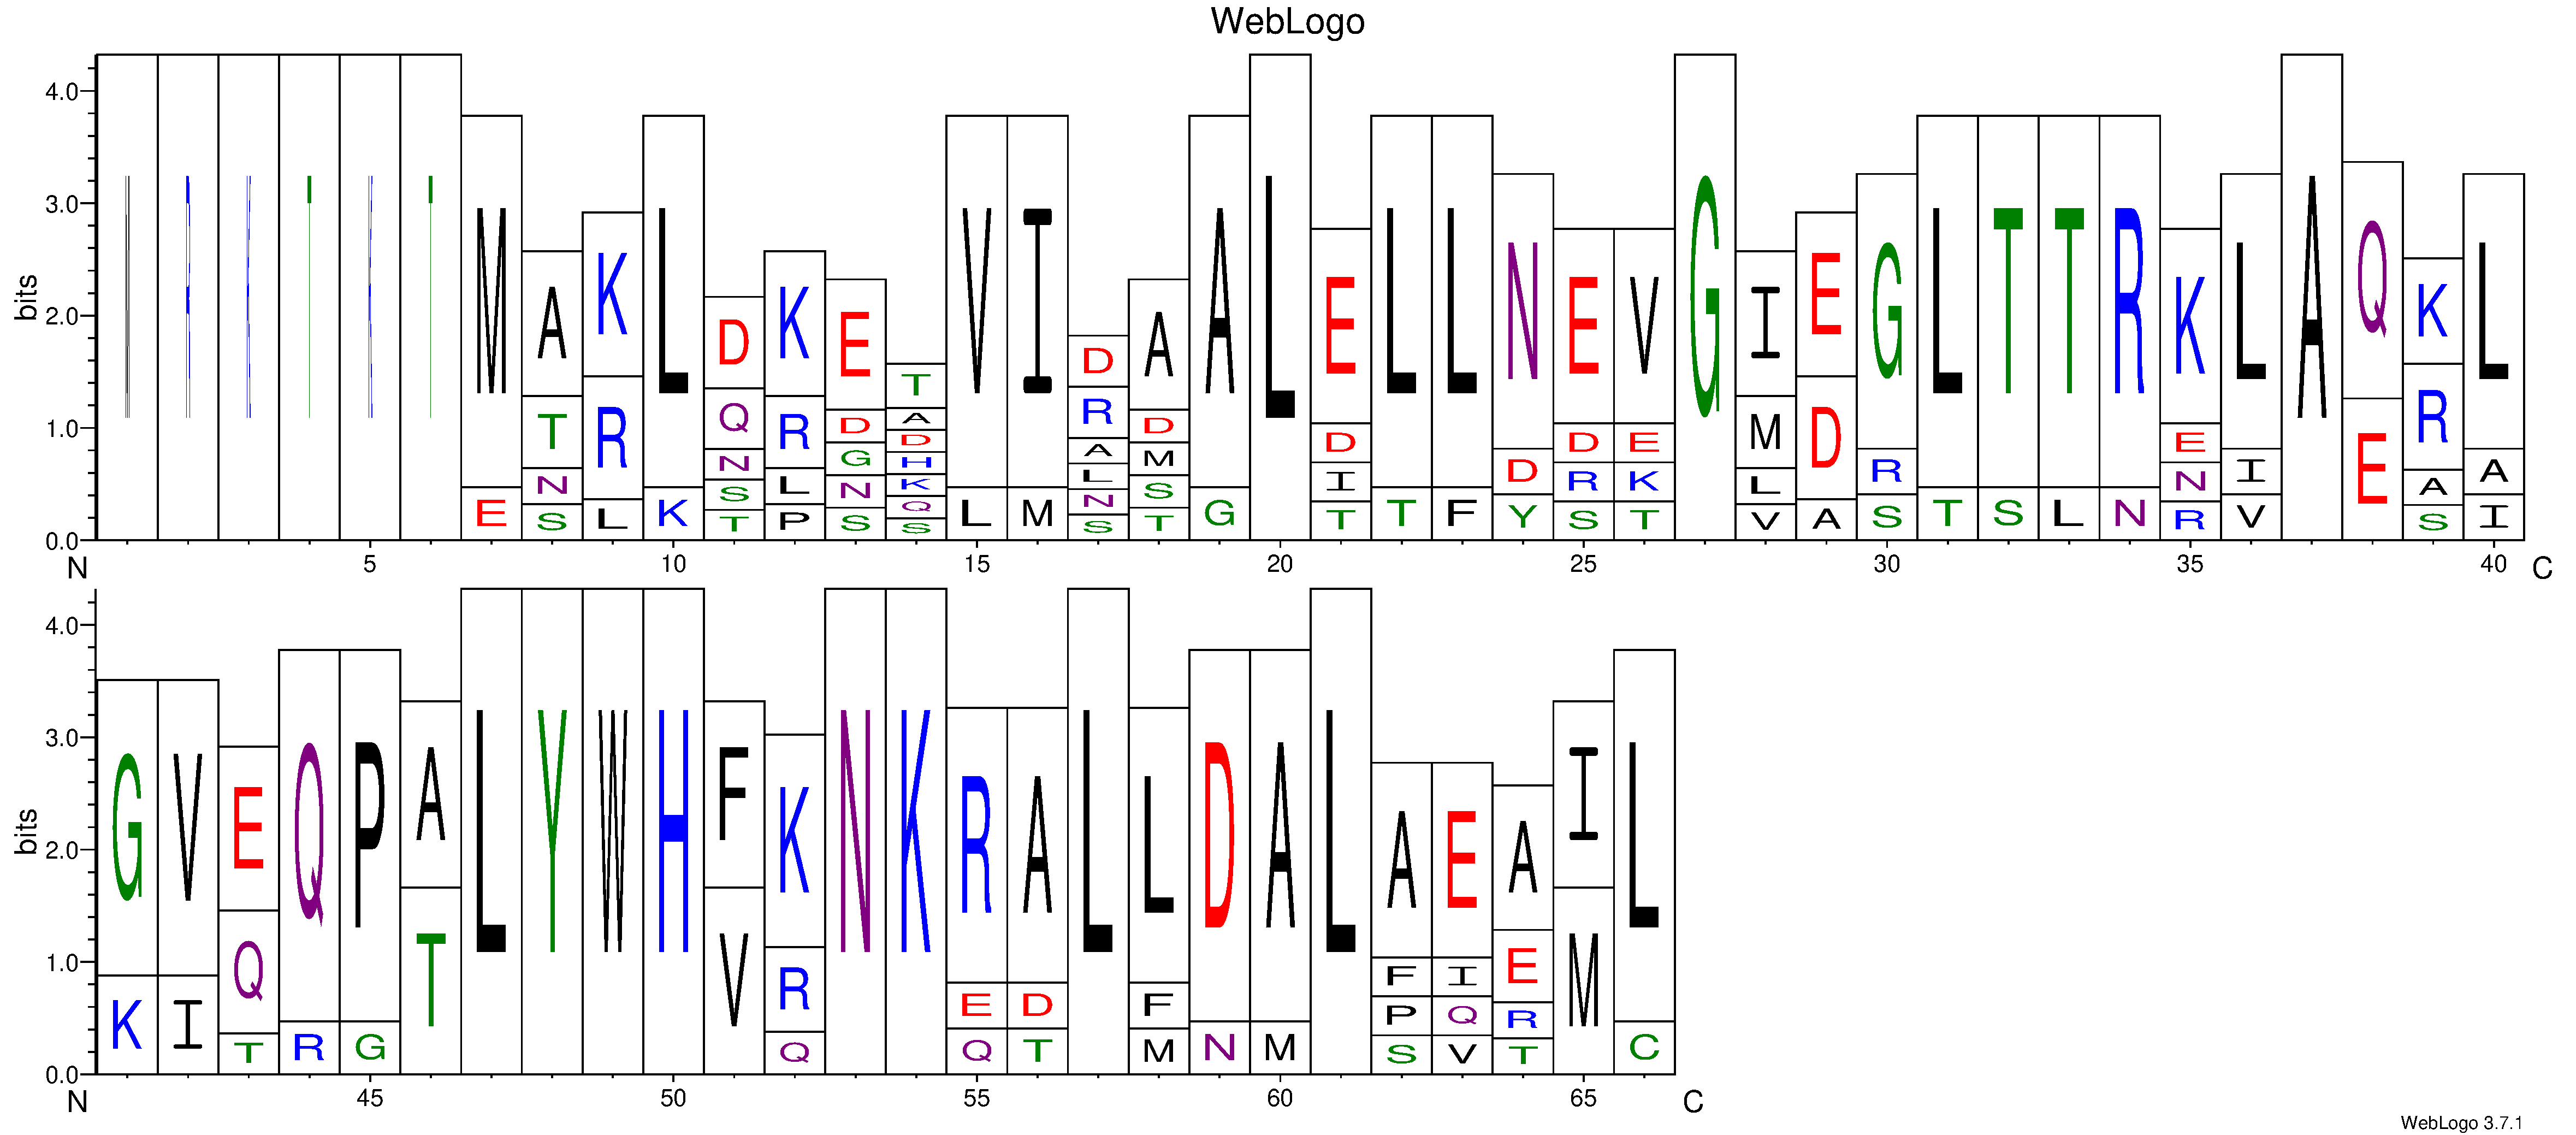

La seconde méthode est celle de restreindre l'intervalle de visualisation du WebLogo en se concentrant uniquement sur les domaines précédement enregistrés. On peut choisir de sélectionner un domaine en particulier ou non.

La commande est la suivante :
    `self.domains2WebLogo(self, domain=None)` avec `domain` le nom du domaine d'intérêt par défaut (*None*), le programme lira tous les domaines de la protéine.

In [29]:
P04483.domains2WebLogo()

step 1/2 : searching domains
scanning finish
DNA-binding_HTH_domain,_TetR-type,_conserved_site-21-52.png
weblogo --format PNG -f /Users/aheurtel/Documents/Protein/P04483/Data/alignements.aln -D clustal -A protein -s large -t WebLogo -n 40 -l 21 -u 52 --stack-width 20 --aspect-ratio 8 --box yes --resolution 400 --show-ends yes -c chemistryDNA-binding_HTH_domain,_TetR-type,_conserved_site --composition none -o /Users/aheurtel/Documents/Protein/P04483/Data/WebLogo/DNA-binding_HTH_domain,_TetR-type,_conserved_site-21-52.png
DNA-binding_HTH_domain,_TetR-type-3-63.png
weblogo --format PNG -f /Users/aheurtel/Documents/Protein/P04483/Data/alignements.aln -D clustal -A protein -s large -t WebLogo -n 40 -l 3 -u 63 --stack-width 20 --aspect-ratio 8 --box yes --resolution 400 --show-ends yes -c chemistryDNA-binding_HTH_domain,_TetR-type --composition none -o /Users/aheurtel/Documents/Protein/P04483/Data/WebLogo/DNA-binding_HTH_domain,_TetR-type-3-63.png
Tetracycline_repressor_TetR,_C-terminal-69-2

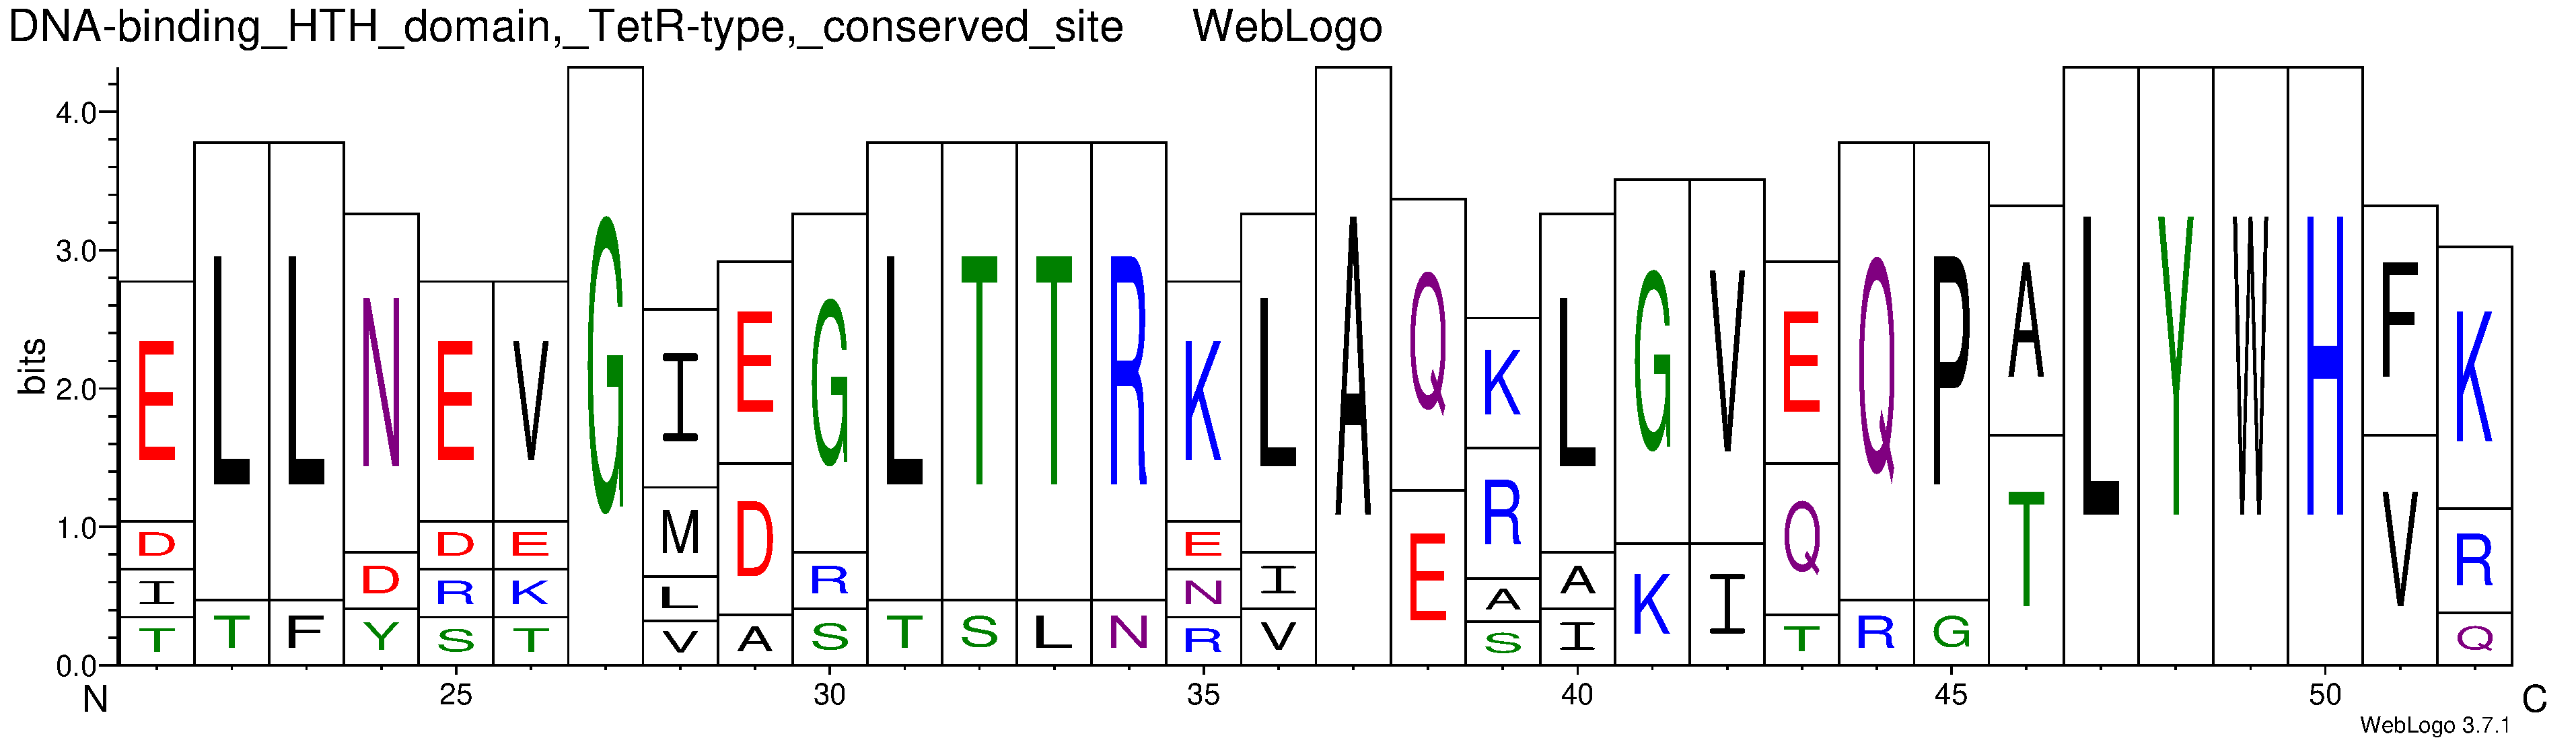

### Calcul de l'entropie
Deux procédés existent dans ce programme pour calculer l'entropie.
1. en excluant les gap
2. en considérant les gap comme des acides aminées
#### Procédé 1 avec pyproteins

In [13]:
oMsa = msaLib.Msa(fileName=P04483.clustalFile)
oMsa.entropyS

[0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 1.2130075659799042,
 0.9743147528693494,
 0.37677016125643675,
 1.4941751382893085,
 1.2130075659799042,
 1.3862943611198906,
 1.9061547465398496,
 0.37677016125643675,
 0.37677016125643675,
 1.7328679513998633,
 1.3862943611198906,
 0.37677016125643675,
 -0.0,
 1.0735428464085233,
 0.37677016125643675,
 0.37677016125643675,
 0.7356219397587946,
 1.0735428464085233,
 1.073542846408523,
 -0.0,
 1.2130075659799042,
 0.9743147528693494,
 0.7356219397587946,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 1.0735428464085233,
 0.7356219397587946,
 -0.0,
 0.6615632381579821,
 1.2554823251787535,
 0.7356219397587946,
 0.5623351446188083,
 0.5623351446188083,
 0.9743147528693494,
 0.37677016125643675,
 0.37677016125643675,
 0.6931471805599453,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.6931471805599453,
 0.900256

#### Procédé 2

In [16]:
P04483.msa()
P04483.entropy

pos  1 is M   1 / 8 = 0.125
pos  1 is -   7 / 8 = 0.875
			entropy = 0.37677016125643675
pos  2 is R   1 / 8 = 0.125
pos  2 is -   7 / 8 = 0.875
			entropy = 0.37677016125643675
pos  3 is K   1 / 8 = 0.125
pos  3 is -   7 / 8 = 0.875
			entropy = 0.37677016125643675
pos  4 is T   1 / 8 = 0.125
pos  4 is -   7 / 8 = 0.875
			entropy = 0.37677016125643675
pos  5 is K   1 / 8 = 0.125
pos  5 is -   7 / 8 = 0.875
			entropy = 0.37677016125643675
pos  6 is T   1 / 8 = 0.125
pos  6 is -   7 / 8 = 0.875
			entropy = 0.37677016125643675
pos  7 is E   1 / 8 = 0.125
pos  7 is M   7 / 8 = 0.875
			entropy = 0.37677016125643675
pos  8 is A   4 / 8 = 0.5
pos  8 is T   2 / 8 = 0.25
pos  8 is N   1 / 8 = 0.125
pos  8 is S   1 / 8 = 0.125
			entropy = 1.2130075659799042
pos  9 is L   1 / 8 = 0.125
pos  9 is K   4 / 8 = 0.5
pos  9 is R   3 / 8 = 0.375
			entropy = 0.9743147528693494
pos  10 is K   1 / 8 = 0.125
pos  10 is L   7 / 8 = 0.875
			entropy = 0.37677016125643675
pos  11 is T   1 / 8 = 0.125
po

[0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 1.2130075659799042,
 0.9743147528693494,
 0.37677016125643675,
 1.4941751382893085,
 1.2130075659799042,
 1.3862943611198906,
 1.9061547465398496,
 0.37677016125643675,
 0.37677016125643675,
 1.7328679513998633,
 1.3862943611198906,
 0.37677016125643675,
 0.0,
 1.0735428464085233,
 0.37677016125643675,
 0.37677016125643675,
 0.7356219397587946,
 1.0735428464085233,
 1.0735428464085233,
 0.0,
 1.2130075659799042,
 0.9743147528693494,
 0.7356219397587946,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 0.37677016125643675,
 1.0735428464085233,
 0.7356219397587946,
 0.0,
 0.6615632381579821,
 1.2554823251787535,
 0.7356219397587946,
 0.5623351446188083,
 0.5623351446188083,
 0.9743147528693494,
 0.37677016125643675,
 0.37677016125643675,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.900256051268

##### Représentation graphique

In [17]:
import matplotlib.pyplot as plt

In [18]:
#Paramètre d'affichage
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


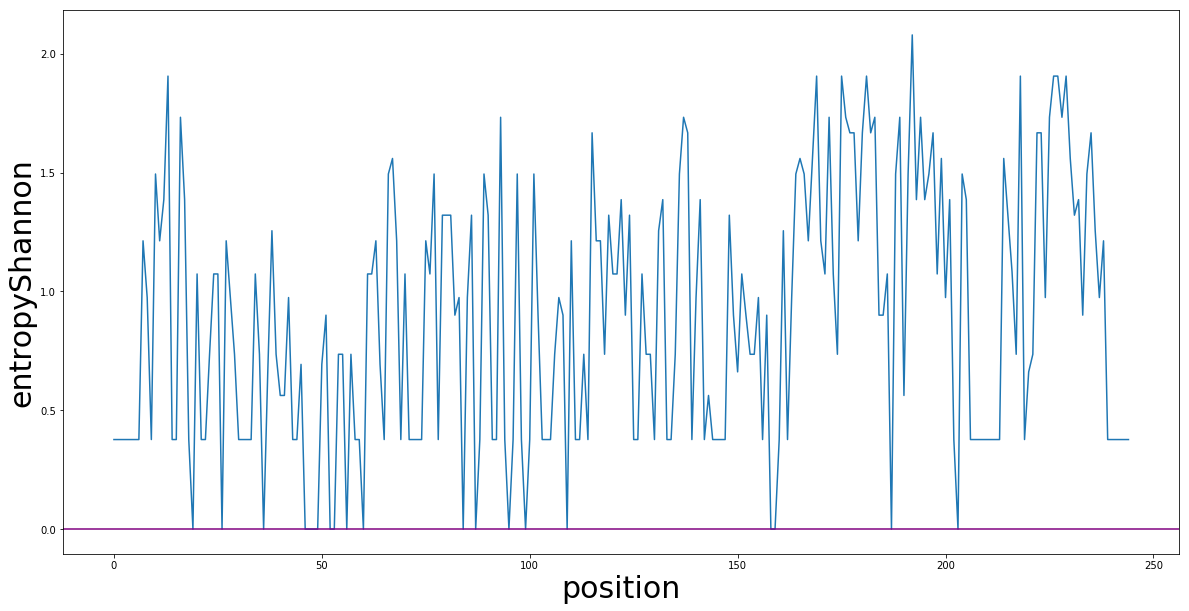

In [19]:
plt.plot(P04483.entropy)
plt.ylabel('entropyShannon', fontsize=30)
plt.xlabel('position', fontsize=30)
axhline(0, color='purple')
plt.show()

# Résumé de toutes les commandes
L'exécution du bloc suivant permet de vérifier l'intégralité des fonctions principales de proteinus.

In [73]:
# Protéine sans intérêt ici
P51513 = Protein('P51513')
P51513.scanDomains()

Download sequence
from https://www.uniprot.org/uniprot/?query=P51513&format=tab&columns=sequence
step 1/2 : searching domains
step 2/2 : scanning
scanning finish


In [64]:
#Réalisation d'un blast
shutil.copyfile('/Users/aheurtel/Documents/Stage/P51513.xml', '/Users/aheurtel/Documents/Protein/P51513/Data/blast.xml')

'/Users/aheurtel/Documents/Protein/P51513/Data/blast.xml'

In [13]:
P51513.homology()
P51513.clustal()

NameError: name 'P51513' is not defined

In [67]:
P51513 = Protein('P51513')
P51513.scanDomains()
shutil.copyfile('/Users/aheurtel/Documents/Stage/P51513.xml', '/Users/aheurtel/Documents/Protein/P51513/Data/blast.xml')
P51513.homology()
P51513.clustal()

Download sequence
from https://www.uniprot.org/uniprot/?query=P51513&format=tab&columns=sequence
step 1/2 : searching domains
step 2/2 : scanning
scanning finish
DEBUG MODE	BLAST : DISABLED
DEBUG MODE	HOMOLOGY FILE : /Users/aheurtel/Documents/Protein/P51513/Data/blast.xml
file /Users/aheurtel/Documents/Protein/P51513/Data/homology.fasta created
Alignements with Clustal omega
rename : /Users/aheurtel/Documents/Protein/P51513/Data/alignements.aln-clustal_num.clustal_num in /Users/aheurtel/Documents/Protein/P51513/Data/alignements.clustal


# Références
1.tetR - Tetracycline repressor protein class B from transposon Tn10 - Escherichia coli - tetR gene & protein. Available at: https://www.uniprot.org/uniprot/P04483. (Accessed: 15th March 2019)


**Stage** : *mmsb février à avril 2019*  
**Stagiaire** : [*Antoine Heurtel*](https://fr.linkedin.com/in/antoine-heurtel-lyon), follow me on [GitHub](https://github.com/AntoineHeurtel)  
**Mail** : *(antoine.heurtel@gmail.com)*